In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors
from matplotlib import pyplot as plt

In [ ]:
df_vaccination = pd.read_csv('country_vaccinations.csv')
df_vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df_vaccination.shape
df_vaccination.isnull().sum()
df_vaccination.describe()

(79486, 15)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     38681
people_vaccinated                      40822
people_fully_vaccinated                43276
daily_vaccinations_raw                 46273
daily_vaccinations                       313
total_vaccinations_per_hundred         38681
people_vaccinated_per_hundred          40822
people_fully_vaccinated_per_hundred    43276
daily_vaccinations_per_million           313
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.080500e+04,3.866400e+04,3.621000e+04,3.321300e+04,7.917300e+04,40805.000000,38664.000000,36210.000000,79173.000000
mean,4.135588e+07,1.621727e+07,1.259584e+07,2.752489e+05,1.355272e+05,74.623116,39.116166,33.365977,3387.588837
std,2.068219e+08,6.475464e+07,5.060136e+07,1.238163e+06,7.923790e+05,64.452589,28.869980,27.803403,4002.754509
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.820380e+05,3.213258e+05,2.191782e+05,5.169000e+03,9.680000e+02,13.830000,10.080000,5.820000,697.000000
50%,3.244783e+06,1.985224e+06,1.502740e+06,2.611100e+04,7.747000e+03,61.030000,38.290000,28.110000,2227.000000
75%,1.549510e+07,8.354898e+06,6.581286e+06,1.278700e+05,4.563700e+04,125.750000,66.012500,59.040000,4890.000000
max,3.108286e+09,1.268180e+09,1.232543e+09,2.474100e+07,2.242429e+07,334.120000,123.790000,121.220000,117497.000000


In [ ]:
df_vaccine_country = df_vaccination.drop(['source_name','source_website','vaccines'],axis=1)
df_vaccine_country.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0


In [ ]:
#处理日期和NaN
df_vaccine_country["date"] = pd.to_datetime(df_vaccine_country["date"], format = '%Y-%m-%d')
df_vaccine_country = df_vaccine_country.replace([np.inf, -np.inf], np.nan)
df_vaccine_country = df_vaccine_country.fillna(0)
df_vaccine_country.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64

In [ ]:
#计算各国不同疫苗的总数，平均数，最大数，最小数的函数
def vaccination_country(col_name,func_name):
    if func_name == 'sum':
        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .sum()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                            )
    elif func_name == 'mean':
        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .mean()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )
    elif func_name == 'max':
        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .max()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )
    elif func_name == 'min':
        return  (df_vaccine_country[['country',col_name]].groupby(by='country')
                                 .min()
                                 .sort_values(by=col_name,ascending= False)
                                 .reset_index()
                                )

In [ ]:
#计算对应数据
max_total_vaccinations = vaccination_country('total_vaccinations','max')
sum_people_vaccinated = vaccination_country('people_vaccinated','sum')
sum_people_fully_vaccinated = vaccination_country('people_fully_vaccinated','sum')
avg_total_vaccinations = vaccination_country('total_vaccinations_per_hundred','mean')
avg_people_vaccinated = vaccination_country('people_vaccinated_per_hundred','mean')
avg_people_fully_vaccinated = vaccination_country('people_fully_vaccinated_per_hundred','mean')
avg_daily_vaccinations = vaccination_country('daily_vaccinations_per_million','mean')

In [ ]:
#计算各国日接种最大最小值
def daily_vaccination_country(col_name,func_name):
    daily_vaccination = (df_vaccine_country
                                 .pivot_table(index='country',columns='date',values=col_name)
                                    )
    if func_name == 'max':
        daily_vaccination['Highest Daily Vaccination'] = daily_vaccination.max(axis=1)
        daily_vaccination['Date - Highest Daily Vaccination'] = daily_vaccination.idxmax(axis=1)
        daily_vaccination.sort_values(by='Highest Daily Vaccination',ascending=False,inplace=True)
        daily_vaccination.rename_axis('',axis=1,inplace=True)

        return daily_vaccination[['Highest Daily Vaccination','Date - Highest Daily Vaccination']].reset_index()

    elif func_name == 'min':

        daily_vaccination.replace(0.00,np.nan,inplace=True)
        daily_vaccination['Lowest Daily Vaccination'] = daily_vaccination.min(axis=1)
        daily_vaccination['Date - Lowest Daily Vaccination'] = daily_vaccination.idxmin(axis=1)
        daily_vaccination.sort_values(by='Lowest Daily Vaccination',ascending=False,inplace=True)
        daily_vaccination.rename_axis('',axis=1,inplace=True)
        return daily_vaccination[['Lowest Daily Vaccination','Date - Lowest Daily Vaccination']].reset_index()

In [ ]:
highest_daily_vaccination = daily_vaccination_country('daily_vaccinations','max')
lowest_daily_vaccination = daily_vaccination_country('daily_vaccinations','min')

<AxesSubplot:xlabel='country', ylabel='total_vaccinations'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Total Vaccinations'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of total vaccinations!')]

<AxesSubplot:xlabel='country', ylabel='total_vaccinations'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Total Vaccinations'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of total vaccinations!')]

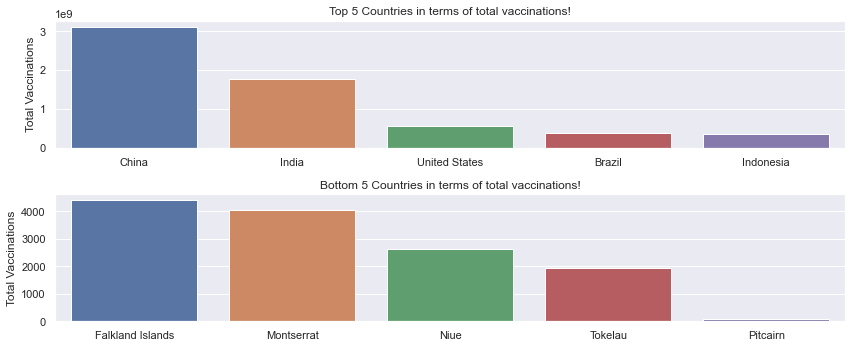

In [ ]:
#将计算好的数据可视化
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize' : (12,5)})
fig, axes  = plt.subplots(2,1)
sns.barplot(x='country',y='total_vaccinations',data=max_total_vaccinations.head(),ax=axes[0])
axes[0].set(xlabel = '', ylabel = 'Total Vaccinations', title ='Top 5 Countries in terms of total vaccinations!')
sns.barplot(x='country',y='total_vaccinations',data=max_total_vaccinations.tail(),ax=axes[1])
axes[1].set(xlabel = '', ylabel = 'Total Vaccinations', title ='Bottom 5 Countries in terms of total vaccinations!')
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='country', ylabel='people_vaccinated'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Vaccinated'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of people vaccinated!')]

<AxesSubplot:xlabel='country', ylabel='people_vaccinated'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Vaccinated'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of people vaccinated!')]

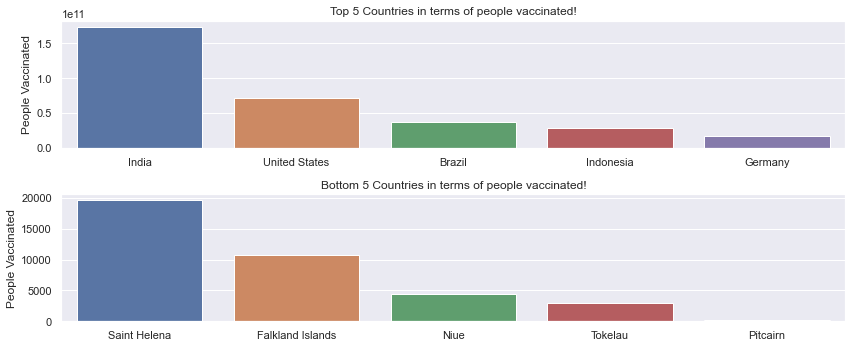

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country',y='people_vaccinated',data=sum_people_vaccinated.head(),ax=axes[0])
axes[0].set(xlabel = '', ylabel = 'People Vaccinated', title ='Top 5 Countries in terms of people vaccinated!')
sns.barplot(x='country', y='people_vaccinated',data=sum_people_vaccinated.tail(),ax=axes[1])
axes[1].set(xlabel = '', ylabel = 'People Vaccinated', title ='Bottom 5 Countries in terms of people vaccinated!')
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='country', ylabel='people_fully_vaccinated'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Fully Vaccinated'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of people fully vaccinated!')]

<AxesSubplot:xlabel='country', ylabel='people_fully_vaccinated'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Fully Vaccinated'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of people fully vaccinated!')]

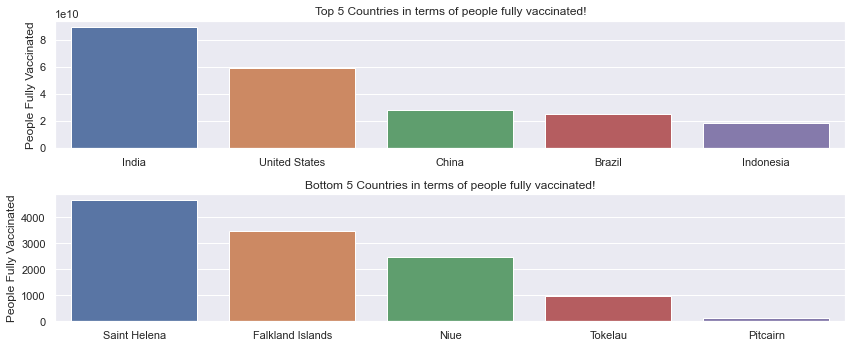

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country',y='people_fully_vaccinated',data=sum_people_fully_vaccinated.head(),ax=axes[0])
axes[0].set(xlabel = '', ylabel = 'People Fully Vaccinated', title ='Top 5 Countries in terms of people fully vaccinated!')
sns.barplot(x='country',y='people_fully_vaccinated',data=sum_people_fully_vaccinated.tail(),ax=axes[1])
axes[1].set(xlabel = '', ylabel = 'People Fully Vaccinated', title ='Bottom 5 Countries in terms of people fully vaccinated!')
# plt.ticklabel_format(style='plain', axis='y') #Uncomment if y label needs to display accurate values
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='country', ylabel='total_vaccinations_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Average Vaccinations per 100'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of average vaccinations per hundred!')]

<AxesSubplot:xlabel='country', ylabel='total_vaccinations_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Average Vaccinations per 100'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of average vaccinations per hundred!')]

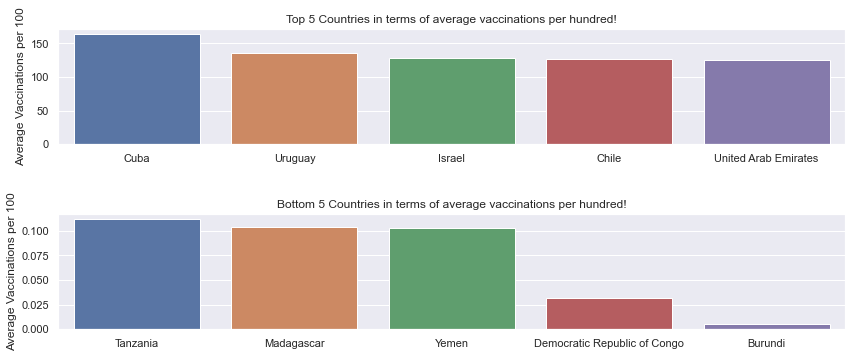

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country', y='total_vaccinations_per_hundred',data=avg_total_vaccinations.head(),ax=axes[0])
axes[0].set(xlabel='', ylabel='Average Vaccinations per 100', title='Top 5 Countries in terms of average vaccinations per hundred!')
sns.barplot(x='country', y='total_vaccinations_per_hundred',data=avg_total_vaccinations.tail(),ax=axes[1])
axes[1].set(xlabel='', ylabel='Average Vaccinations per 100', title='Bottom 5 Countries in terms of average vaccinations per hundred!')
fig.tight_layout(h_pad=3)
plt.show()

<AxesSubplot:xlabel='country', ylabel='people_vaccinated_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Vaccinated per 100'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of average people vaccinated per hundred!')]

<AxesSubplot:xlabel='country', ylabel='people_vaccinated_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Vaccinated per 100'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of average people vaccinated per hundred!')]

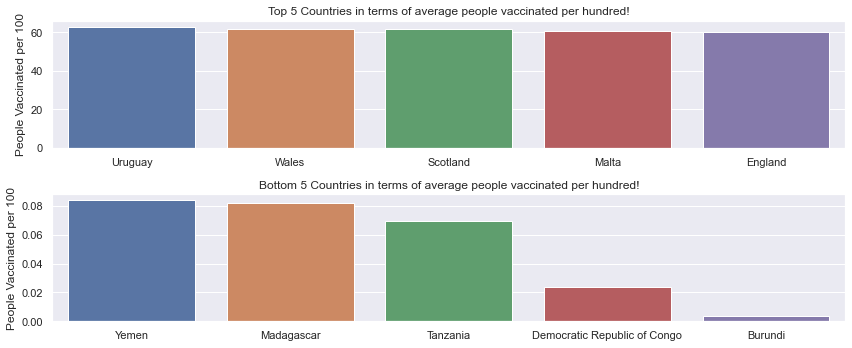

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country', y='people_vaccinated_per_hundred',data=avg_people_vaccinated.head(),ax=axes[0])
axes[0].set(xlabel='', ylabel='People Vaccinated per 100', title='Top 5 Countries in terms of average people vaccinated per hundred!')
sns.barplot(x='country', y='people_vaccinated_per_hundred',data=avg_people_vaccinated.tail(),ax=axes[1])
axes[1].set(xlabel='', ylabel='People Vaccinated per 100', title='Bottom 5 Countries in terms of average people vaccinated per hundred!')
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='country', ylabel='people_fully_vaccinated_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Fully Vaccinated per 100'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of average people fully vaccinated per hundred!')]

<AxesSubplot:xlabel='country', ylabel='people_fully_vaccinated_per_hundred'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'People Fully Vaccinated per 100'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of average people fully vaccinated per hundred!')]

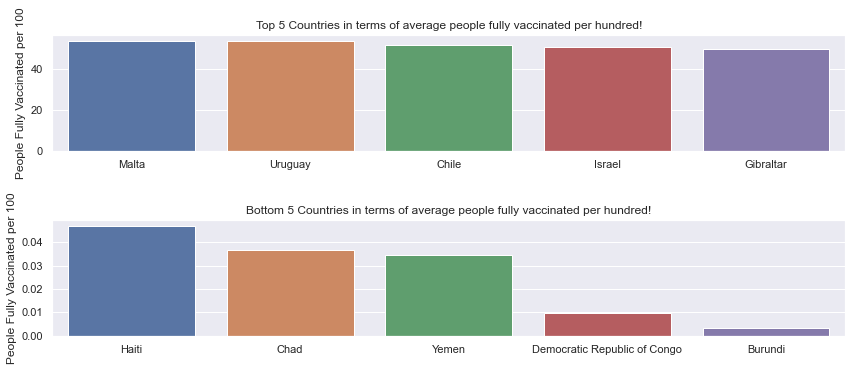

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country', y='people_fully_vaccinated_per_hundred',data=avg_people_fully_vaccinated.head(),ax=axes[0])
axes[0].set(xlabel='', ylabel='People Fully Vaccinated per 100', title='Top 5 Countries in terms of average people fully vaccinated per hundred!')
sns.barplot(x='country', y='people_fully_vaccinated_per_hundred',data=avg_people_fully_vaccinated.tail(),ax=axes[1])
axes[1].set(xlabel='', ylabel='People Fully Vaccinated per 100', title='Bottom 5 Countries in terms of average people fully vaccinated per hundred!')
fig.tight_layout(h_pad=3)
plt.show()

<AxesSubplot:xlabel='country', ylabel='Highest Daily Vaccination'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Daily Vaccination'),
 Text(0.5, 1.0, 'Highest Daily Vaccination by Country')]

<AxesSubplot:xlabel='country', ylabel='Lowest Daily Vaccination'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Daily Vaccination'),
 Text(0.5, 1.0, 'Lowest Daily Vaccination by Country')]

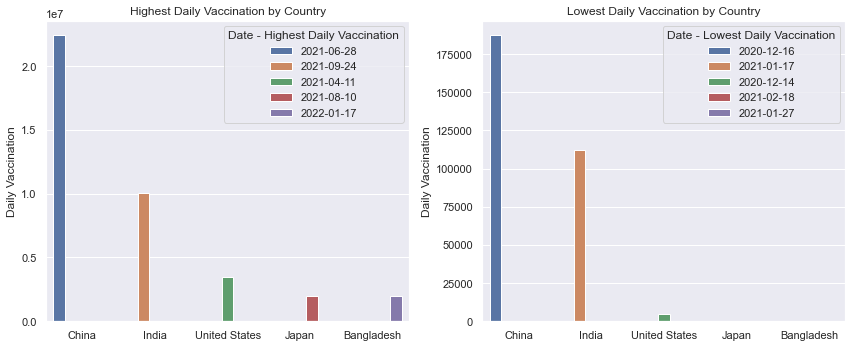

In [ ]:
highest_countries = ['China', 'India', 'United States', 'Japan', 'Bangladesh']
daily_top5_highest = highest_daily_vaccination[highest_daily_vaccination['country'].isin(highest_countries)].copy()
daily_top5_highest['Date - Highest Daily Vaccination'] = daily_top5_highest['Date - Highest Daily Vaccination'].apply(lambda x:x.date())
daily_top5_lowest = lowest_daily_vaccination[lowest_daily_vaccination['country'].isin(highest_countries)].copy()
daily_top5_lowest['Date - Lowest Daily Vaccination'] = daily_top5_lowest['Date - Lowest Daily Vaccination'].apply(lambda x:x.date())
fig, axes = plt.subplots(1,2)
sns.barplot(data=daily_top5_highest,x="country", y="Highest Daily Vaccination",ax=axes[0],hue='Date - Highest Daily Vaccination')
axes[0].set(xlabel='',ylabel='Daily Vaccination',title='Highest Daily Vaccination by Country')
sns.barplot(data=daily_top5_lowest,x="country", y="Lowest Daily Vaccination",ax=axes[1],hue='Date - Lowest Daily Vaccination')
axes[1].set(xlabel='',ylabel='Daily Vaccination',title='Lowest Daily Vaccination by Country')
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='country', ylabel='daily_vaccinations_per_million'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Daily Vaccinations per Million'),
 Text(0.5, 1.0, 'Top 5 Countries in terms of daily vaccinations per million!')]

<AxesSubplot:xlabel='country', ylabel='daily_vaccinations_per_million'>

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Daily Vaccinations per Million'),
 Text(0.5, 1.0, 'Bottom 5 Countries in terms of daily vaccinations per million!')]

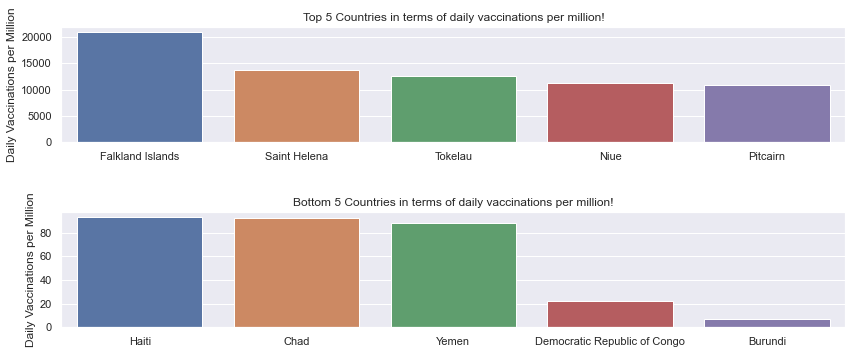

In [ ]:
fig, axes = plt.subplots(2,1)
sns.barplot(x='country', y='daily_vaccinations_per_million',data=avg_daily_vaccinations.head(),ax=axes[0])
axes[0].set(xlabel='', ylabel='Daily Vaccinations per Million', title='Top 5 Countries in terms of daily vaccinations per million!')
sns.barplot(x='country', y='daily_vaccinations_per_million',data=avg_daily_vaccinations.tail(),ax=axes[1])
axes[1].set(xlabel='', ylabel='Daily Vaccinations per Million', title='Bottom 5 Countries in terms of daily vaccinations per million!')
fig.tight_layout(h_pad=3)
plt.show()

In [ ]:
from plotly.offline import init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
list(max_total_vaccinations['country'].head())

['China', 'India', 'United States', 'Brazil', 'Indonesia']

In [ ]:
top5_country_total = ['China', 'India', 'United States', 'Brazil', 'Indonesia']
top5_country_total_day = df_vaccine_country[df_vaccine_country['country'].isin(top5_country_total)].copy()
top5_country_total_day['30 - Day Rolling'] = top5_country_total_day['total_vaccinations'].rolling(window=30).mean()

In [ ]:
fig = px.line(top5_country_total_day,x="date",y="total_vaccinations",color='country',
                 labels={"country" : 'Top 5 Country', 'date' : 'Date', 'total_vaccinations' : "Total Vaccinations"},
                title="Total Vaccination Progress - Top 5 Country",template='plotly_dark')
for country in top5_country_total_day['country'].unique():
    fig.add_scatter(x=top5_country_total_day[top5_country_total_day['country'] == country]['date']
                    ,y=top5_country_total_day[top5_country_total_day['country'] == country]['30 - Day Rolling']
                    ,mode="lines",name='30 Day Rolling Vaccination ' + country)
fig.show()

In [ ]:
top5_country_total_day['Day of Week'] = top5_country_total_day['date'].apply(lambda x:x.day_name())
top5_country_total_day['Day of Week'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [ ]:
fig = px.box(top5_country_total_day,x='Day of Week',y='daily_vaccinations',color='country',
             labels={"country" : 'Top 5 Country', 'daily_vaccinations' : "Daily Vaccination"},
                title="Dailly Vaccination by Day of Week - Top 5 Country",template='plotly_dark')
fig.show()

In [ ]:
top5_country_total_day['Month'] = top5_country_total_day['date'].apply(lambda x:x.month_name())
top5_country_total_day['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
fig = px.bar(top5_country_total_day,x='Month',y='daily_vaccinations',color='country',
             labels={"country" : 'Top 5 Country', 'daily_vaccinations' : "Daily Vaccination"},
                title="Dailly Vaccination by Month - Top 5 Country",template='plotly_dark')
fig.show()

In [ ]:
fig = px.choropleth(max_total_vaccinations,locations='country',locationmode='country names',
                   color='total_vaccinations',hover_name="country", template='plotly_dark',
                   title= 'Total Vaccination Status Across Countries',projection='natural earth',
                   labels={'country' : 'Country','total_vaccinations' : 'Total Vaccinations'})
fig.show()

In [ ]:
#处理疫苗制造商信息
df_manu = pd.read_csv('country_vaccinations_by_manufacturer.csv', parse_dates = ['date'])
print(df_manu.columns)
df_manu.describe
print(df_manu['location'].nunique())
df_manu['location'].unique()

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')


<bound method NDFrame.describe of              location       date             vaccine  total_vaccinations
0             Austria 2021-01-08     Johnson&Johnson                   0
1             Austria 2021-01-08             Moderna                   0
2             Austria 2021-01-08  Oxford/AstraZeneca                   0
3             Austria 2021-01-08     Pfizer/BioNTech               31632
4             Austria 2021-01-15     Johnson&Johnson                   0
...               ...        ...                 ...                 ...
28828  European Union 2022-02-24  Oxford/AstraZeneca            67392849
28829  European Union 2022-02-24     Pfizer/BioNTech           592488693
28830  European Union 2022-02-24   Sinopharm/Beijing             2292946
28831  European Union 2022-02-24             Sinovac                   9
28832  European Union 2022-02-24           Sputnik V             1845103

[28833 rows x 4 columns]>

41


array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Nepal', 'Netherlands', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United States',
       'Uruguay', 'European Union'], dtype=object)

In [ ]:
#按地区比较
countries = ['Hong Kong', 'Japan', 'Spain', 'European Union', 'United States', 'Chile', 'South Korea']
#Vaccines used in each country
vax_grp = df_manu.groupby(['location', 'vaccine'])[['date', 'total_vaccinations']]
max_vax = vax_grp.max().reset_index()
max_vax.loc[max_vax['location'].isin(countries),:].sort_values(by = ['location','total_vaccinations'], ascending = [True, False])

,location,vaccine,date,total_vaccinations
15,Chile,Sinovac,2022-02-22,25375908
14,Chile,Pfizer/BioNTech,2022-02-22,7847248
12,Chile,CanSino,2022-02-22,574208
13,Chile,Oxford/AstraZeneca,2022-02-22,548995
43,European Union,Pfizer/BioNTech,2022-02-24,592488693
41,European Union,Moderna,2022-02-24,143383618
42,European Union,Oxford/AstraZeneca,2022-02-24,67392849
40,European Union,Johnson&Johnson,2022-02-24,18502638
44,European Union,Sinopharm/Beijing,2022-02-24,2292946
46,European Union,Sputnik V,2022-02-24,1845103


In [ ]:
df_manu.groupby(['vaccine'])[['date', 'total_vaccinations']].max().sort_values(by = 'total_vaccinations', ascending = False)

,date,total_vaccinations
vaccine,,
Pfizer/BioNTech,2022-02-24,592488693
Moderna,2022-02-24,207943834
Oxford/AstraZeneca,2022-02-24,67392849
Sinovac,2022-02-24,25375908
Sinopharm/Beijing,2022-02-24,19961665
Johnson&Johnson,2022-02-24,18502638
Sputnik V,2022-02-24,1845103
CanSino,2022-02-22,574208
Novavax,2022-02-24,52306


In [ ]:
#按日期比较
dates = ('2021-02-19','2021-06-04', '2021-09-10', '2021-12-10', '2022-03-11')
vac_2 = df_manu.loc[(df_manu['location']=='Netherlands') & (df_manu['date'].isin(dates))]
vac_2 = vac_2.sort_values(by = ['vaccine','date'], ascending = [False, True])
vac_2['growth rate'] = vac_2['total_vaccinations'].pct_change()
vac_2['growth rate'] = vac_2['growth rate']*100
vac_2['growth rate'] = vac_2['growth rate'].map("{:.2f}%".format)
vac_2[['date', 'vaccine', 'total_vaccinations', 'growth rate']]

,date,vaccine,total_vaccinations,growth rate
14875,2021-02-19,Pfizer/BioNTech,931430,nan%
14935,2021-06-04,Pfizer/BioNTech,7536441,709.13%
14991,2021-09-10,Pfizer/BioNTech,17682449,134.63%
15043,2021-12-10,Pfizer/BioNTech,19734375,11.60%
14874,2021-02-19,Oxford/AstraZeneca,69129,-99.65%
14934,2021-06-04,Oxford/AstraZeneca,2085141,2916.30%
14990,2021-09-10,Oxford/AstraZeneca,2800631,34.31%
15042,2021-12-10,Oxford/AstraZeneca,2800806,0.01%
14873,2021-02-19,Moderna,37220,-98.67%
14933,2021-06-04,Moderna,781809,2000.51%


<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

Text(0.5, 0, '')

Text(0, 0.5, 'No. of vaccinations administered')

Text(0.5, 1.0, 'Vaccine used for Netherlands')

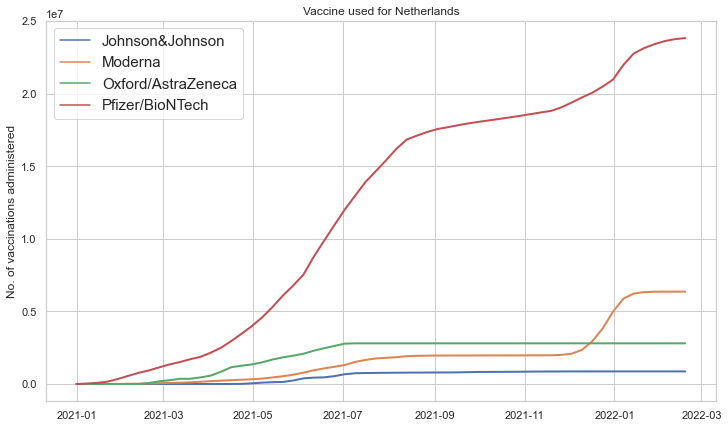

In [ ]:
vac_p = df_manu.loc[(df_manu['location']=='Netherlands')]
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(x = 'date', y = 'total_vaccinations', hue = 'vaccine', data = vac_p, ax = axes, linewidth = 2)
axes.set_xlabel("")
axes.set_ylabel("No. of vaccinations administered")
axes.set_title("Vaccine used for Netherlands")
axes.legend(title ="", prop = {'size':15.1})